<a href="https://colab.research.google.com/github/Gmajorseven/training-data-sci/blob/main/lab9_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การจัดกลุ่มข้อมูล (K-Means) : Unsupervised Learning

เป็นการจัดกลุ่มข้อมูล (Cluster) โดยไม่ทราบผลเฉลย (Label/Answer/Target)

### Step 1: การจัดเตรียมข้อมูล

In [1]:
import numpy as np

# ข้อมูลอาร์เรย์ 2 มิติ (2D)
data = np.array([[8, 1], [12, 1], [42, 1], [10, 2], [39, 2], [26, 5], [23, 6], [30, 6], [25, 8]])

data

array([[ 8,  1],
       [12,  1],
       [42,  1],
       [10,  2],
       [39,  2],
       [26,  5],
       [23,  6],
       [30,  6],
       [25,  8]])

### Step 2: Data Visualization

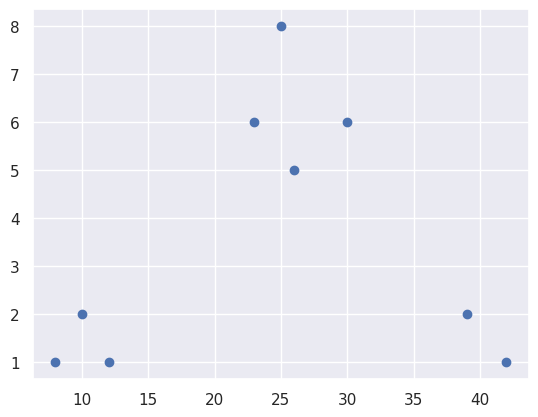

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.scatter(data[:, 0], data[:, 1]) # ข้อมูลคอลัมน์ 0, คอลัมน์ 1

### Step 3: สร้างแบบจำลอง (Model)

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init='auto')   # สร้างแบบจำลองที่ต้องการแบ่งข้อมูลเป็น 3 กลุ่ม
model.fit(data)                                  # ส่งข้อมูลเข้าไปเรียนรู้ในแบบจำลอง

KMeans(n_clusters=3)

In [4]:
y_predict = model.predict(data)
y_predict

array([2, 2, 0, 2, 0, 1, 1, 1, 1], dtype=int32)

### Step 4: Data Visualization

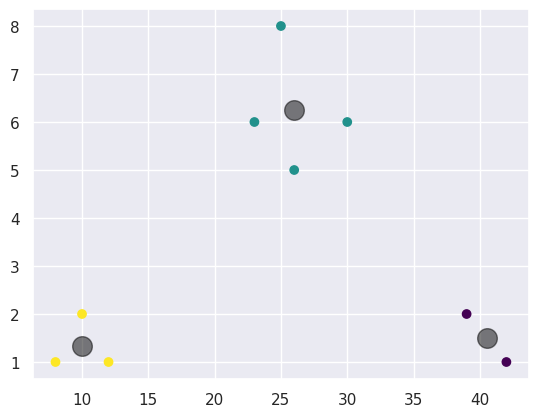

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=y_predict, cmap='viridis') # แสดงจุดแยกตามสีของ กลุ่ม y_predict

centers = model.cluster_centers_  # ค่ากลางของแต่ละ Cluster
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) # แสดงค่ากลางของแต่ละ Cluster

### Step 5: การหาค่า K ที่เหมาะสมจากจุดหักศอก (Elbow method)

In [6]:
from sklearn.cluster import KMeans

# ข้อมูลอาร์เรย์ 2 มิติ (2D)
data = np.array([[8, 1], [12, 1], [42, 1], [10, 2], [39, 2], [26, 5], [23, 6], [30, 6], [25, 8]])

data


array([[ 8,  1],
       [12,  1],
       [42,  1],
       [10,  2],
       [39,  2],
       [26,  5],
       [23,  6],
       [30,  6],
       [25,  8]])

In [7]:
inertias = []                                 # ใช้เก็บค่าผลรวมของระยะห่างจากทุกจุดไปยังจุดศูนย์กลาง Cluster

for i in range(1, 9):                         # วนรอบเพื่อสร้าง Cluster ตั้งแต่ 1 - 8 กลุ่ม
  model = KMeans(n_clusters=i, n_init='auto') # สร้างแบบจำลอง
  model.fit(data)                                # ทำการเรียนรู้จากข้อมูล (data)
  inertias.append(model.inertia_)             # ทำการจัดเก็บค่าผลลัพธ์ เพื่อนำไปหาค่า K ที่เหมาะสม

### Step 6: Data Visualization

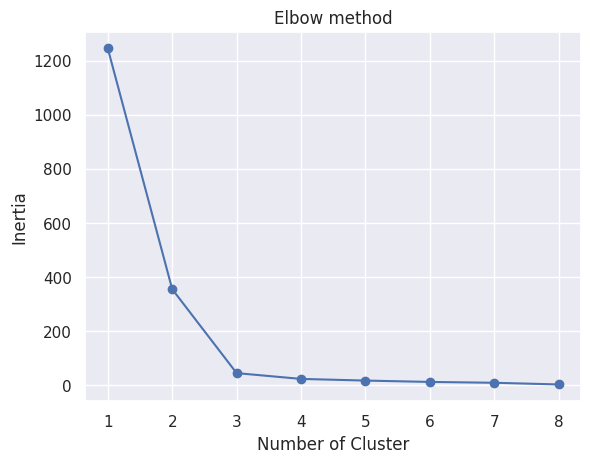

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.plot(range(1, 9), inertias, marker='o') # แสดงค่าผลรวมของระยะห่างจากทุกจุดไปยังจุดศูนย์กลาง Cluster ที่ถูกเก็บไว้ในอาร์เรย์ (inertias)
plt.title('Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()